# Andaman and Nicobar earthquake analysis

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### About dataset:
dataset contain 2744 records
North India earthquake data magnitude more than 2.5
dataset duration 1900-2023


In [2]:
#importing the dataset
db=pd.read_csv('andman_and_necobar.csv')


In [3]:
db.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-03-31T18:26:41.097Z,11.8701,93.7364,128.366,4.2,mb,36.0,87.0,0.995,0.40,...,2023-04-01T04:38:48.165Z,"110 km ENE of Port Blair, India",earthquake,8.09,7.120,0.112,25.0,reviewed,us,us
1,2023-03-07T11:11:46.782Z,13.3127,92.4297,10.000,4.9,mb,77.0,90.0,6.588,0.86,...,2023-03-13T16:19:54.572Z,"Andaman Islands, India region",earthquake,8.36,1.884,0.075,56.0,reviewed,us,us
2,2023-02-24T07:03:17.833Z,9.8546,92.7139,48.355,4.3,mb,19.0,180.0,6.914,0.82,...,2023-03-11T13:14:40.040Z,"Nicobar Islands, India region",earthquake,12.40,7.943,0.168,10.0,reviewed,us,us
3,2023-02-22T09:31:56.373Z,9.2648,93.9450,11.020,4.5,mb,37.0,136.0,5.629,0.68,...,2023-03-11T08:04:56.040Z,"Nicobar Islands, India region",earthquake,10.59,5.132,0.122,20.0,reviewed,us,us
4,2023-01-30T18:45:37.506Z,12.1363,93.5873,107.401,5.0,mb,93.0,48.0,5.837,0.69,...,2023-02-28T17:39:13.880Z,"105 km ENE of Port Blair, India",earthquake,6.09,4.575,0.061,89.0,reviewed,us,us


In [4]:
db.shape

(3349, 22)

In [5]:
db.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3349 entries, 0 to 3348
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             3349 non-null   object 
 1   latitude         3349 non-null   float64
 2   longitude        3349 non-null   float64
 3   depth            3349 non-null   float64
 4   mag              3349 non-null   float64
 5   magType          3349 non-null   object 
 6   nst              2626 non-null   float64
 7   gap              2930 non-null   float64
 8   dmin             545 non-null    float64
 9   rms              3348 non-null   float64
 10  net              3349 non-null   object 
 11  id               3349 non-null   object 
 12  updated          3349 non-null   object 
 13  place            3344 non-null   object 
 14  type             3349 non-null   object 
 15  horizontalError  469 non-null    float64
 16  depthError       1004 non-null   float64
 17  magError      

In [7]:
db.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,3349.000000,3349.000000,3349.000000,3349.000000,2626.000000,2930.000000,545.000000,3348.000000,469.000000,1004.000000,546.000000,2960.000000
mean,9.791788,93.394035,33.721279,4.570066,47.157654,116.819556,3.528064,0.900666,8.681087,9.779701,0.129557,14.308108
std,2.290284,0.661044,21.833232,0.417559,65.578611,52.362573,2.464367,0.249319,2.528836,9.709887,0.057910,19.999907
min,6.381900,92.022000,0.800000,3.500000,4.000000,16.300000,0.154000,0.130000,1.980000,0.000000,0.039000,1.000000
25%,7.842000,92.863300,28.600000,4.300000,15.000000,77.025000,1.835000,0.740000,7.100000,1.940250,0.086000,3.000000
50%,9.046000,93.564000,30.000000,4.500000,25.000000,103.950000,3.215000,0.900000,8.300000,6.800000,0.119000,8.000000
75%,11.630000,93.994000,33.000000,4.800000,49.000000,167.000000,4.600000,1.060000,10.100000,13.500000,0.164750,17.000000
max,14.413000,94.262500,177.200000,7.500000,646.000000,326.900000,30.252000,1.750000,17.900000,72.300000,0.519000,212.000000


### Datacleaning

In [8]:
db.isnull().mean()*100

time                0.000000
latitude            0.000000
longitude           0.000000
depth               0.000000
mag                 0.000000
magType             0.000000
nst                21.588534
gap                12.511197
dmin               83.726486
rms                 0.029860
net                 0.000000
id                  0.000000
updated             0.000000
place               0.149298
type                0.000000
horizontalError    85.995820
depthError         70.020902
magError           83.696626
magNst             11.615408
status              0.000000
locationSource      0.000000
magSource           0.000000
dtype: float64

In [9]:
db.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
3344,1990-08-18T18:52:36.840Z,7.507,93.975,21.4,6.0,mw,NaN,NaN,NaN,1.4,...,2022-04-28T19:41:01.135Z,"232 km NW of Sabang, Indonesia",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
3345,1990-08-13T08:46:45.940Z,12.225,93.701,33.0,4.5,mb,NaN,NaN,NaN,1.1,...,2014-11-07T00:46:56.276Z,"120 km ENE of Port Blair, India",earthquake,NaN,NaN,NaN,2.0,reviewed,us,us
3346,1990-05-04T04:28:49.210Z,12.057,92.592,33.0,4.1,mb,NaN,NaN,NaN,1.5,...,2014-11-07T00:46:16.917Z,"41 km NNW of Bamboo Flat, India",earthquake,NaN,NaN,NaN,2.0,reviewed,us,us
3347,1990-01-22T18:49:35.070Z,11.538,92.341,33.0,4.8,mb,NaN,NaN,NaN,0.8,...,2014-11-07T00:45:34.859Z,"44 km WSW of Bamboo Flat, India",earthquake,NaN,NaN,NaN,1.0,reviewed,us,us
3348,1990-01-13T19:11:47.290Z,7.504,94.174,33.0,4.1,mb,NaN,NaN,NaN,1.1,...,2014-11-07T00:45:32.635Z,"218 km NW of Sabang, Indonesia",earthquake,NaN,NaN,NaN,1.0,reviewed,us,us


we can see in places we have some data of other countries also but as we want data of only india,nepal we will remove rest

In [10]:
db['place']=db['place'].str.split(',').str[1]

In [11]:
db['place']=db['place'].str.strip()

In [12]:
db['place'].unique()

array(['India', 'India region', nan, 'Indonesia', 'Myanmar'], dtype=object)

In [13]:
#db.replace('India region','India',inplace=True)

In [14]:
#db['place'].fillna('India',inplace=True)

In [15]:
#db=db[db['place']=='India']

In [16]:
db['place'].unique()

array(['India', 'India region', nan, 'Indonesia', 'Myanmar'], dtype=object)

In [17]:
db.shape

(3349, 22)

In [18]:
db['magSource'].unique()

array(['us', 'gcmt', 'hrv', 'iscgem'], dtype=object)

 We will be trying to remove columns which wont be useful to us

In [19]:
db['magSource'].value_counts()

us        3021
hrv        284
gcmt        43
iscgem       1
Name: magSource, dtype: int64

In [20]:
db['locationSource'].unique()

array(['us', 'iscgem'], dtype=object)

In [21]:
db['magSource'].value_counts()

us        3021
hrv        284
gcmt        43
iscgem       1
Name: magSource, dtype: int64

In [22]:
db['status'].unique()

array(['reviewed'], dtype=object)

In [23]:
db['type'].unique()

array(['earthquake'], dtype=object)

In [24]:
db['updated']

0       2023-04-01T04:38:48.165Z
1       2023-03-13T16:19:54.572Z
2       2023-03-11T13:14:40.040Z
3       2023-03-11T08:04:56.040Z
4       2023-02-28T17:39:13.880Z
                  ...           
3344    2022-04-28T19:41:01.135Z
3345    2014-11-07T00:46:56.276Z
3346    2014-11-07T00:46:16.917Z
3347    2014-11-07T00:45:34.859Z
3348    2014-11-07T00:45:32.635Z
Name: updated, Length: 3349, dtype: object

we are dropping few columns which contain reductant info and which wont have much effect on our data

1. dropping type,status,place as they contain same value in all the columns
2. dropping columns updated ,magsource,locationSource as they contain information regarding the meta data like place where these data were collected location when was the data last updated and much more 

In [25]:
db.drop(columns=['updated','type','status','magSource','locationSource','place'],inplace=True)

In [26]:
db.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,horizontalError,depthError,magError,magNst
0,2023-03-31T18:26:41.097Z,11.8701,93.7364,128.366,4.2,mb,36.0,87.0,0.995,0.40,us,us6000k16v,8.09,7.120,0.112,25.0
1,2023-03-07T11:11:46.782Z,13.3127,92.4297,10.000,4.9,mb,77.0,90.0,6.588,0.86,us,us7000jhvh,8.36,1.884,0.075,56.0
2,2023-02-24T07:03:17.833Z,9.8546,92.7139,48.355,4.3,mb,19.0,180.0,6.914,0.82,us,us7000jh1x,12.40,7.943,0.168,10.0
3,2023-02-22T09:31:56.373Z,9.2648,93.9450,11.020,4.5,mb,37.0,136.0,5.629,0.68,us,us7000jgtv,10.59,5.132,0.122,20.0
4,2023-01-30T18:45:37.506Z,12.1363,93.5873,107.401,5.0,mb,93.0,48.0,5.837,0.69,us,us6000jkdx,6.09,4.575,0.061,89.0


In [27]:
db['net'].unique()

array(['us', 'iscgem'], dtype=object)

In [28]:
db['id'].unique()

array(['us6000k16v', 'us7000jhvh', 'us7000jh1x', ..., 'usp00048u9',
       'usp00044m0', 'usp000447e'], dtype=object)

In [29]:
db.drop(columns=['id','net'],inplace=True)

dropping id and net beacuse they are the information about how,when and what recorded this data

In [30]:
db.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
0,2023-03-31T18:26:41.097Z,11.8701,93.7364,128.366,4.2,mb,36.0,87.0,0.995,0.40,8.09,7.120,0.112,25.0
1,2023-03-07T11:11:46.782Z,13.3127,92.4297,10.000,4.9,mb,77.0,90.0,6.588,0.86,8.36,1.884,0.075,56.0
2,2023-02-24T07:03:17.833Z,9.8546,92.7139,48.355,4.3,mb,19.0,180.0,6.914,0.82,12.40,7.943,0.168,10.0
3,2023-02-22T09:31:56.373Z,9.2648,93.9450,11.020,4.5,mb,37.0,136.0,5.629,0.68,10.59,5.132,0.122,20.0
4,2023-01-30T18:45:37.506Z,12.1363,93.5873,107.401,5.0,mb,93.0,48.0,5.837,0.69,6.09,4.575,0.061,89.0


In [31]:
db.isnull().mean()*100

time                0.000000
latitude            0.000000
longitude           0.000000
depth               0.000000
mag                 0.000000
magType             0.000000
nst                21.588534
gap                12.511197
dmin               83.726486
rms                 0.029860
horizontalError    85.995820
depthError         70.020902
magError           83.696626
magNst             11.615408
dtype: float64

In [32]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3349 entries, 0 to 3348
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             3349 non-null   object 
 1   latitude         3349 non-null   float64
 2   longitude        3349 non-null   float64
 3   depth            3349 non-null   float64
 4   mag              3349 non-null   float64
 5   magType          3349 non-null   object 
 6   nst              2626 non-null   float64
 7   gap              2930 non-null   float64
 8   dmin             545 non-null    float64
 9   rms              3348 non-null   float64
 10  horizontalError  469 non-null    float64
 11  depthError       1004 non-null   float64
 12  magError         546 non-null    float64
 13  magNst           2960 non-null   float64
dtypes: float64(12), object(2)
memory usage: 366.4+ KB


Lets fill the null values now

In [33]:
db['nst'].fillna(db['nst'].mean(),inplace=True)

In [34]:
db['gap'].fillna(db['gap'].mean(),inplace=True)

In [35]:

db['dmin'].fillna(db['dmin'].mean(),inplace=True)
db['rms'].fillna(db['rms'].mean(),inplace=True)
db['depthError'].fillna(db['depthError'].mean(),inplace=True)
db['horizontalError'].fillna(db['horizontalError'].mean(),inplace=True)
db['magError'].fillna(db['magError'].mean(),inplace=True)
db['magNst'].fillna(db['magNst'].mean(),inplace=True)


In [36]:
db.isnull().mean()*100

time               0.0
latitude           0.0
longitude          0.0
depth              0.0
mag                0.0
magType            0.0
nst                0.0
gap                0.0
dmin               0.0
rms                0.0
horizontalError    0.0
depthError         0.0
magError           0.0
magNst             0.0
dtype: float64

so for now we have replaced all the null values with mean



In [37]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3349 entries, 0 to 3348
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             3349 non-null   object 
 1   latitude         3349 non-null   float64
 2   longitude        3349 non-null   float64
 3   depth            3349 non-null   float64
 4   mag              3349 non-null   float64
 5   magType          3349 non-null   object 
 6   nst              3349 non-null   float64
 7   gap              3349 non-null   float64
 8   dmin             3349 non-null   float64
 9   rms              3349 non-null   float64
 10  horizontalError  3349 non-null   float64
 11  depthError       3349 non-null   float64
 12  magError         3349 non-null   float64
 13  magNst           3349 non-null   float64
dtypes: float64(12), object(2)
memory usage: 366.4+ KB


In [38]:
db['magType'].unique()

array(['mb', 'mww', 'mwb', 'mwc', 'mw'], dtype=object)

In [39]:
db.groupby(['magType','mag']).size()

magType  mag
mb       3.5     4
         3.6     6
         3.7    12
         3.8    23
         3.9    54
                ..
mww      5.4     2
         5.5     2
         5.6     2
         5.7     1
         6.1     1
Length: 79, dtype: int64

'mb' stands for body wave magnitude and is calculated using the amplitude of the earthquake's P-waves and S-waves.

'mwc' stands for moment magnitude (Mw) from complete waveform modeling, which is a type of magnitude scale that takes into account the total energy released by an earthquake.

'mwb' stands for surface wave magnitude and is calculated using the amplitude of the earthquake's surface waves.

'ms' stands for surface wave magnitude and is calculated using the amplitude of the earthquake's surface waves at a period of approximately 20 seconds.

'mw' stands for moment magnitude, which is a type of magnitude scale that takes into account the seismic moment (i.e., the total energy released by an earthquake) and is considered to be a more accurate measure of an earthquake's size than other magnitude types.

In [40]:
db['time']

0       2023-03-31T18:26:41.097Z
1       2023-03-07T11:11:46.782Z
2       2023-02-24T07:03:17.833Z
3       2023-02-22T09:31:56.373Z
4       2023-01-30T18:45:37.506Z
                  ...           
3344    1990-08-18T18:52:36.840Z
3345    1990-08-13T08:46:45.940Z
3346    1990-05-04T04:28:49.210Z
3347    1990-01-22T18:49:35.070Z
3348    1990-01-13T19:11:47.290Z
Name: time, Length: 3349, dtype: object

In [41]:
db['time']=pd.to_datetime(db['time'])

we have converted our time data in datetime format

In [42]:
db.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
0,2023-03-31 18:26:41.097000+00:00,11.8701,93.7364,128.366,4.2,mb,36.0,87.0,0.995,0.40,8.09,7.120,0.112,25.0
1,2023-03-07 11:11:46.782000+00:00,13.3127,92.4297,10.000,4.9,mb,77.0,90.0,6.588,0.86,8.36,1.884,0.075,56.0
2,2023-02-24 07:03:17.833000+00:00,9.8546,92.7139,48.355,4.3,mb,19.0,180.0,6.914,0.82,12.40,7.943,0.168,10.0
3,2023-02-22 09:31:56.373000+00:00,9.2648,93.9450,11.020,4.5,mb,37.0,136.0,5.629,0.68,10.59,5.132,0.122,20.0
4,2023-01-30 18:45:37.506000+00:00,12.1363,93.5873,107.401,5.0,mb,93.0,48.0,5.837,0.69,6.09,4.575,0.061,89.0


Now lets extract date,year,month,day and hour from our data

In [43]:
db['year']=db['time'].dt.year
db['month']=db['time'].dt.month
db['day']=db['time'].dt.day
db['hour']=db['time'].dt.hour
db['min']=db['time'].dt.minute

In [44]:
db.drop(columns='time',inplace=True)

In [45]:
db.head()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,year,month,day,hour,min
0,11.8701,93.7364,128.366,4.2,mb,36.0,87.0,0.995,0.40,8.09,7.120,0.112,25.0,2023,3,31,18,26
1,13.3127,92.4297,10.000,4.9,mb,77.0,90.0,6.588,0.86,8.36,1.884,0.075,56.0,2023,3,7,11,11
2,9.8546,92.7139,48.355,4.3,mb,19.0,180.0,6.914,0.82,12.40,7.943,0.168,10.0,2023,2,24,7,3
3,9.2648,93.9450,11.020,4.5,mb,37.0,136.0,5.629,0.68,10.59,5.132,0.122,20.0,2023,2,22,9,31
4,12.1363,93.5873,107.401,5.0,mb,93.0,48.0,5.837,0.69,6.09,4.575,0.061,89.0,2023,1,30,18,45


Now we have replaced null values extracted value from time columns 
now lets move to data visualization

### Data Visualization

In [46]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)

In [47]:
#import folium

In [48]:
#map=folium.Map(location=[db[latitude[0],db[longitude[]]])


In [49]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3349 entries, 0 to 3348
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latitude         3349 non-null   float64
 1   longitude        3349 non-null   float64
 2   depth            3349 non-null   float64
 3   mag              3349 non-null   float64
 4   magType          3349 non-null   object 
 5   nst              3349 non-null   float64
 6   gap              3349 non-null   float64
 7   dmin             3349 non-null   float64
 8   rms              3349 non-null   float64
 9   horizontalError  3349 non-null   float64
 10  depthError       3349 non-null   float64
 11  magError         3349 non-null   float64
 12  magNst           3349 non-null   float64
 13  year             3349 non-null   int64  
 14  month            3349 non-null   int64  
 15  day              3349 non-null   int64  
 16  hour             3349 non-null   int64  
 17  min           

mb     2952
mwc     316
mwb      35
mww      31
mw       15
Name: magType, dtype: int64


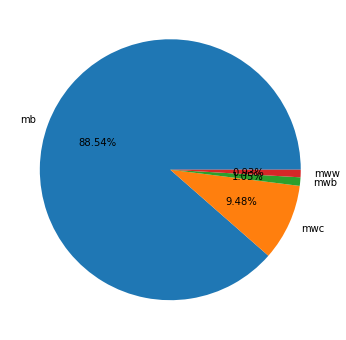

In [50]:
magType=db['magType'].value_counts().index
freq=db['magType'].value_counts().values

plt.pie(x=freq[0:4],labels=magType[0:4],autopct='%1.2f%%')
print(db['magType'].value_counts())

In [51]:
year=db['year'].value_counts().index
freq=db['year'].value_counts().values

([<matplotlib.patches.Wedge at 0x28d54076f70>,
 [Text(-0.5111365498244653, 0.9740325597399412, '2005'),
  Text(0.06306429774904568, -1.0981907367800094, '2004'),
  Text(0.9037308193181736, -0.6271129134490079, '2006'),
  Text(1.0820836104055396, -0.19772470784328605, '2009')],
 [Text(-0.2788017544497083, 0.5312904871308769, '65.38%'),
  Text(0.034398707863115816, -0.5990131291527323, '21.06%'),
  Text(0.49294408326445827, -0.34206158915400425, '7.80%'),
  Text(0.590227423857567, -0.10784984064179239, '5.75%')])

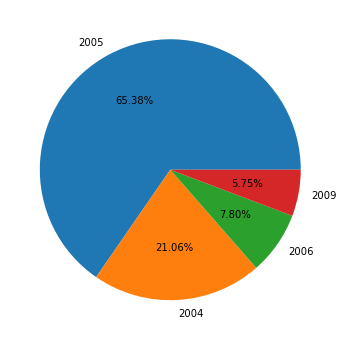

In [52]:
plt.pie(x=freq[0:4],labels=year[0:4],autopct='%1.2f%%')

Most of the earthquakes happened in year 2001

([<matplotlib.patches.Wedge at 0x28d5424ab50>,
 [Text(0.4865728255790656, 0.9865327594195766, '27'),
  Text(-1.097518291159989, 0.07384849740690375, '28'),
  Text(-0.04285356062101163, -1.0991649431919222, '26'),
  Text(0.9998682362702884, -0.4585449924464805, '29')],
 [Text(0.265403359406763, 0.5381087778652236, '35.41%'),
  Text(-0.5986463406327213, 0.04028099858558386, '27.03%'),
  Text(-0.023374669429642708, -0.5995445144683211, '23.87%'),
  Text(0.5453826743292481, -0.250115450425353, '13.69%')])

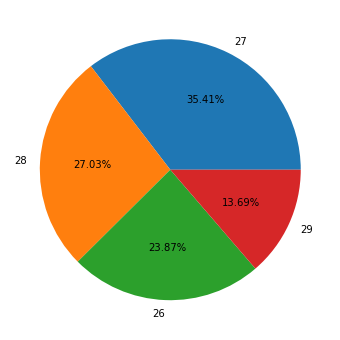

In [53]:
day=db['day'].value_counts().index
freq=db['day'].value_counts().values

plt.pie(x=freq[0:4],labels=day[0:4],autopct='%1.2f%%')

In [54]:
db['day'].value_counts()

27    414
28    316
26    279
29    160
4     117
9     107
1     104
10    102
11     99
30     95
16     93
21     92
25     92
15     88
6      82
5      81
14     80
24     79
13     76
12     76
19     73
17     72
23     70
22     69
2      68
3      67
8      64
31     60
18     60
7      58
20     56
Name: day, dtype: int64

1     975
12    491
3     282
7     227
2     222
4     215
8     208
5     163
10    161
9     157
6     131
11    117
Name: month, dtype: int64


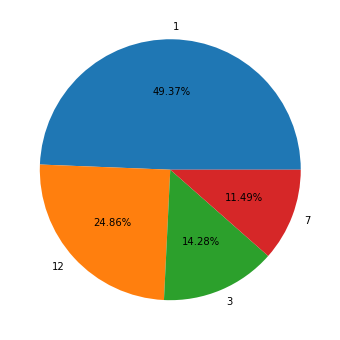

In [55]:
month=db['month'].value_counts().index
freq=db['month'].value_counts().values

plt.pie(x=freq[0:4],labels=month[0:4],autopct='%1.2f%%')
print(db['month'].value_counts())

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mag', ylabel='count'>

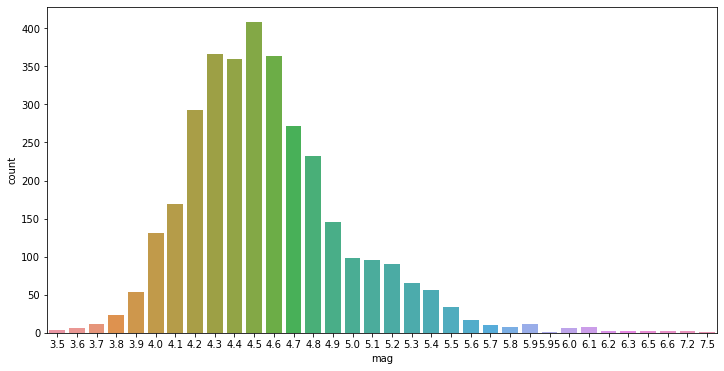

In [56]:
sns.countplot(db['mag'])

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='latitude', ylabel='count'>

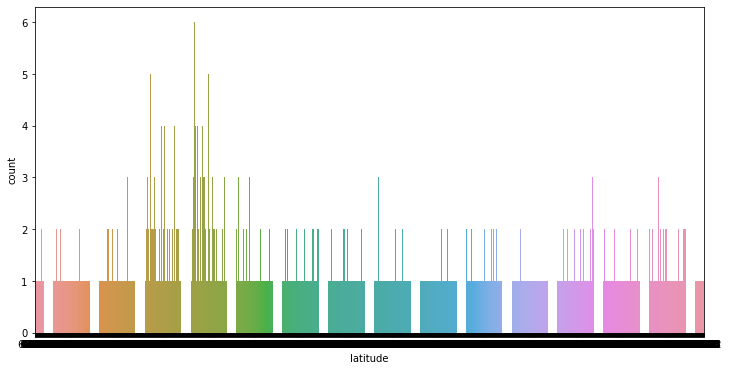

In [57]:
sns.countplot(db['latitude'])

it can be seen almost all values of latitude occur single time except few which occur 2 or 3 times.

repeating latittude represents earthquake reoccuring same place

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='count'>

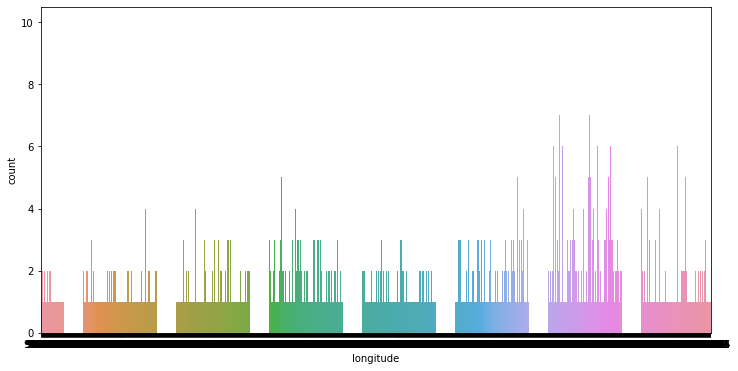

In [58]:
sns.countplot(db['longitude'])

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='depth', ylabel='count'>

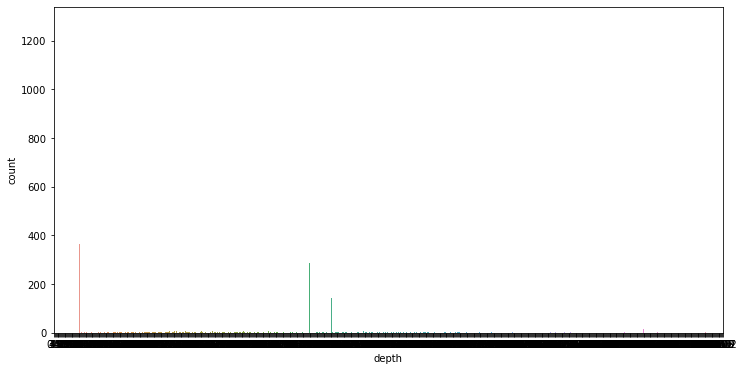

In [59]:
sns.countplot(db['depth'])

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='magType', ylabel='count'>

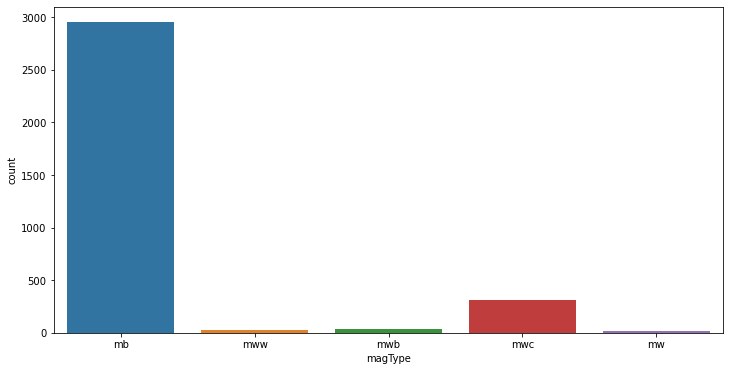

In [60]:
sns.countplot(db['magType'])

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nst', ylabel='count'>

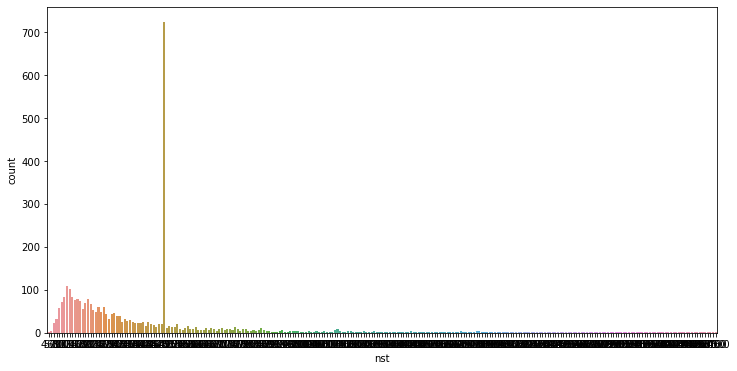

In [61]:
sns.countplot(db['nst'])

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gap', ylabel='count'>

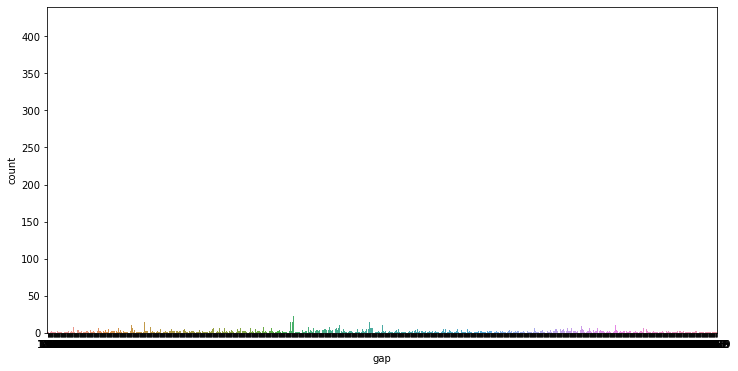

In [62]:
sns.countplot(db['gap'])

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

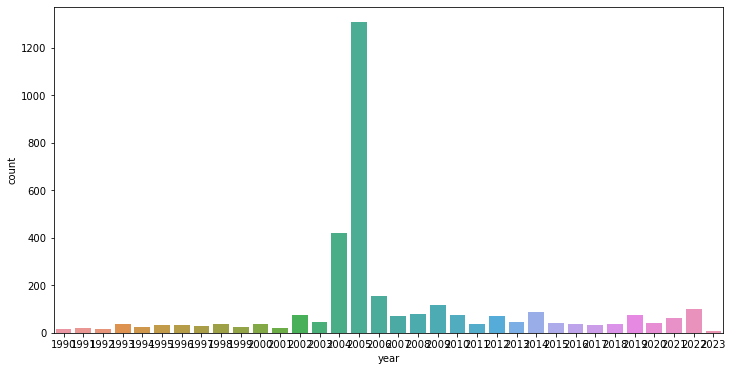

In [63]:
sns.countplot(db['year'])

In [64]:
db.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap',
       'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst',
       'year', 'month', 'day', 'hour', 'min'],
      dtype='object')

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rms', ylabel='count'>

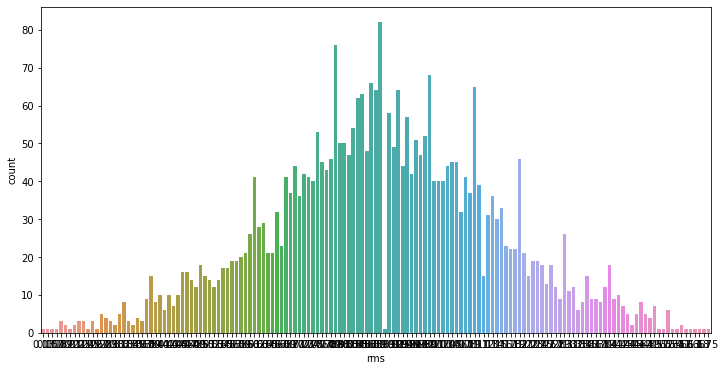

In [65]:
sns.countplot(db['rms'])

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='magNst', ylabel='count'>

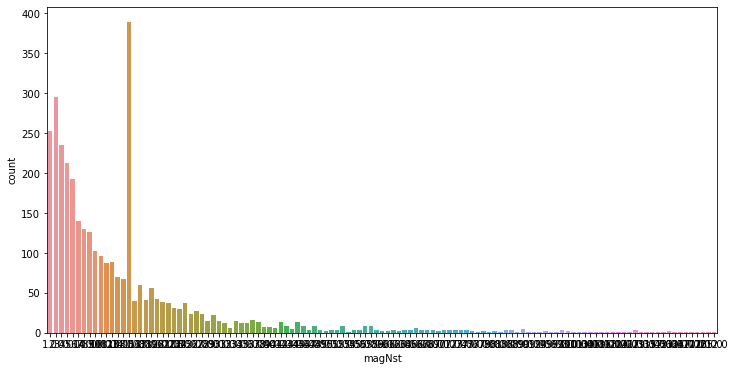

In [66]:
sns.countplot(db['magNst'])

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


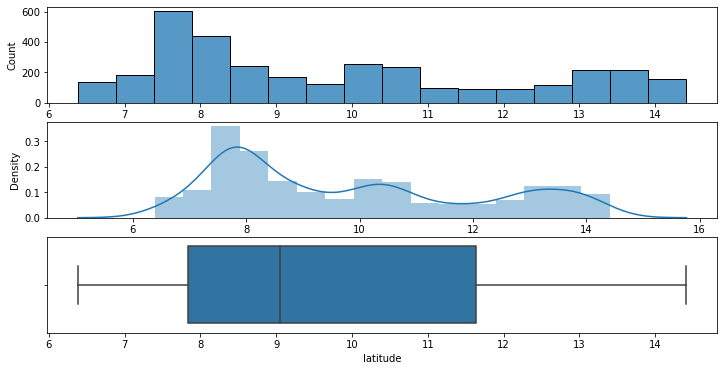

In [67]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(db['latitude'], ax=axs[0]);
sns.distplot(db['latitude'], ax=axs[1])
sns.boxplot(db['latitude'], ax=axs[2]);

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


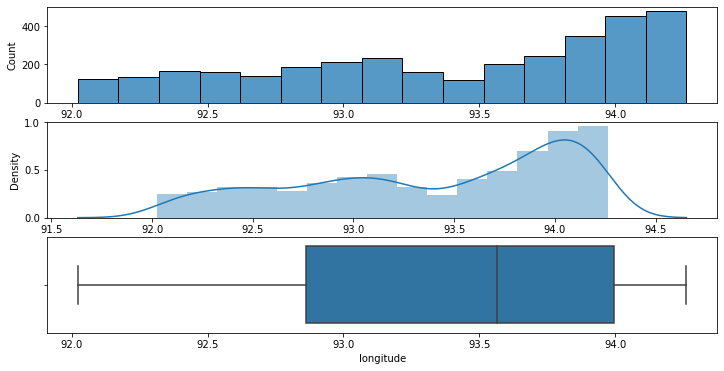

In [68]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(db['longitude'], ax=axs[0]);
sns.distplot(db['longitude'], ax=axs[1])
sns.boxplot(db['longitude'], ax=axs[2]);

In [69]:
db.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap',
       'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst',
       'year', 'month', 'day', 'hour', 'min'],
      dtype='object')

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


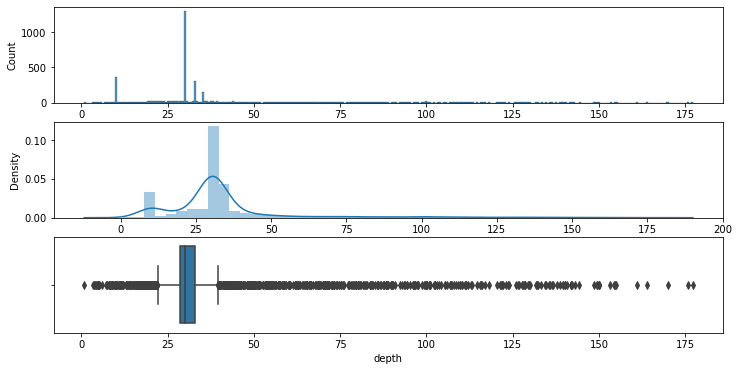

In [70]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(db['depth'], ax=axs[0]);
sns.distplot(db['depth'], ax=axs[1])
sns.boxplot(db['depth'], ax=axs[2]);

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


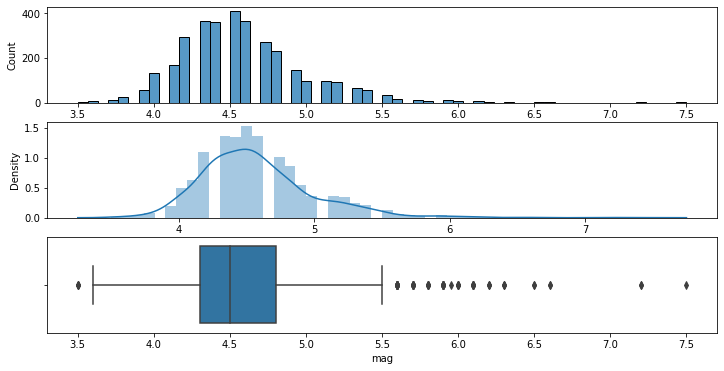

In [71]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(db['mag'], ax=axs[0]);
sns.distplot(db['mag'], ax=axs[1])
sns.boxplot(db['mag'], ax=axs[2]);

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


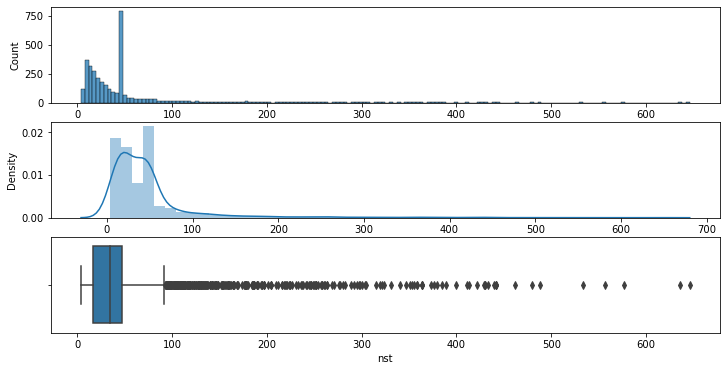

In [72]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(db['nst'], ax=axs[0]);
sns.distplot(db['nst'], ax=axs[1])
sns.boxplot(db['nst'], ax=axs[2]);

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


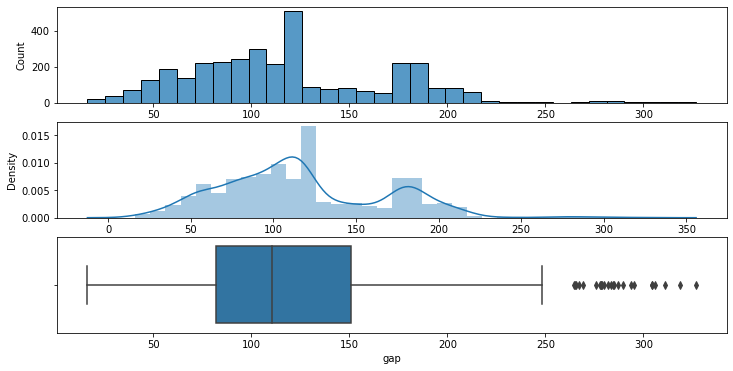

In [73]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(db['gap'], ax=axs[0]);
sns.distplot(db['gap'], ax=axs[1])
sns.boxplot(db['gap'], ax=axs[2]);

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


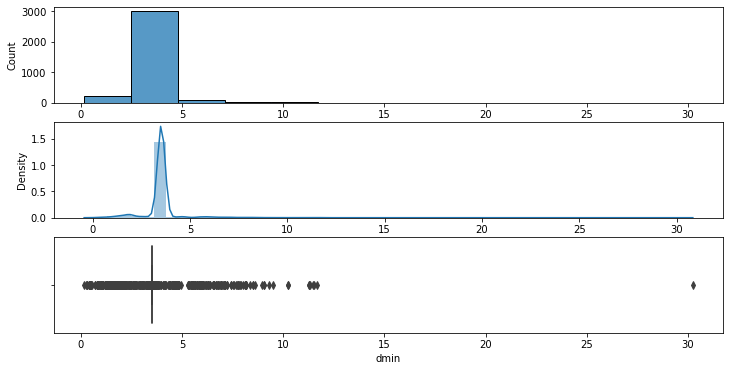

In [74]:

fig, axs = plt.subplots(nrows=3)
sns.histplot(db['dmin'], ax=axs[0]);
sns.distplot(db['dmin'], ax=axs[1])
sns.boxplot(db['dmin'], ax=axs[2]);

### Now lets do bivariate analysis

using scatterplot

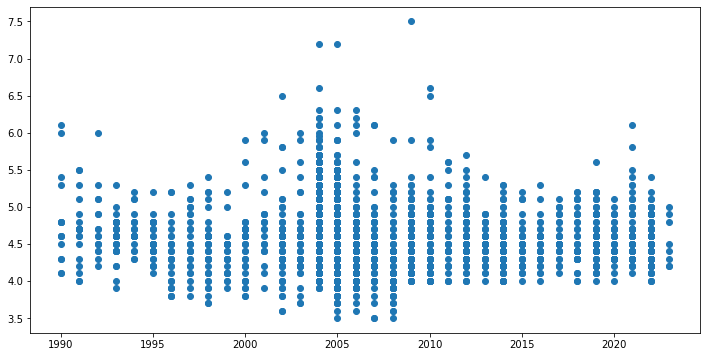

In [75]:
plt.scatter(x='year',y='mag',data=db)

observation:
it can be seen their are more data points after 1980 possible reason for which may be:

1. Data collection technique,instrument for earthquake got serious and efficient

2. In year 2001 their are more no of earthquake that occured


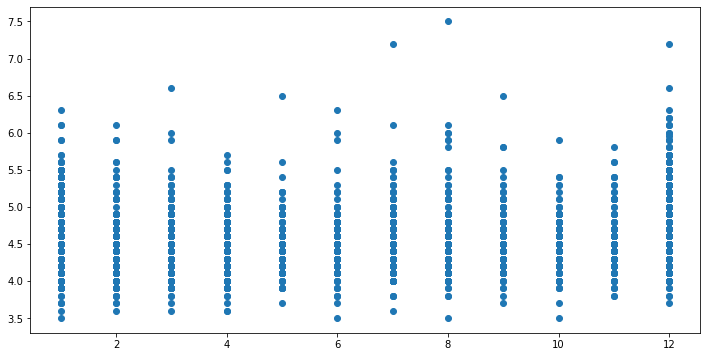

In [76]:
plt.scatter(x='month',y='mag',data=db)

month and magnitude distribution is almost same representing not much impact of month 

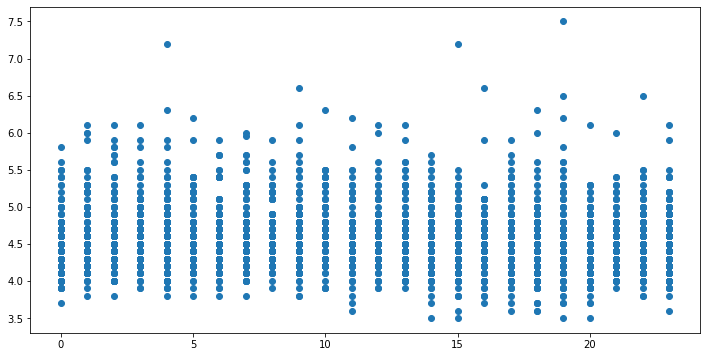

In [77]:
plt.scatter(x='hour',y='mag',data=db)

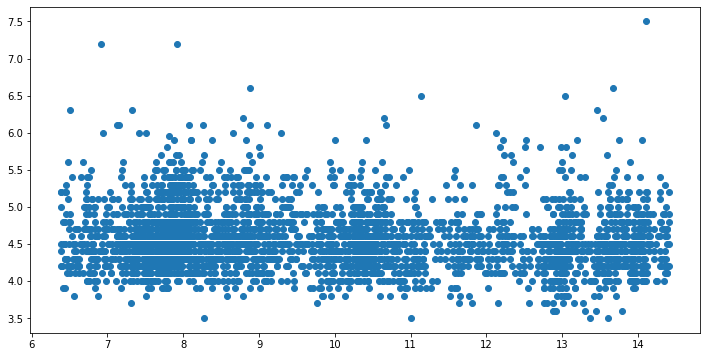

In [78]:
plt.scatter(x='latitude',y='mag',data=db)

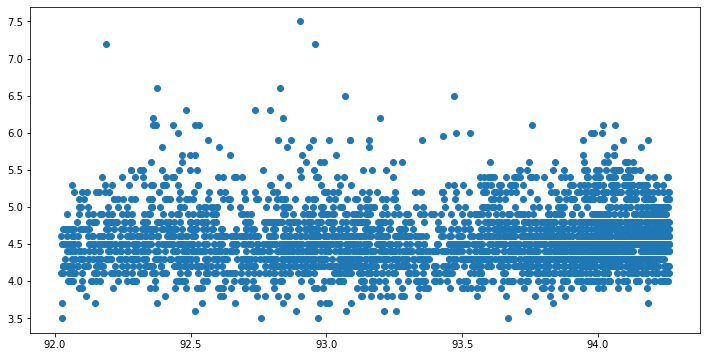

In [79]:
plt.scatter(x='longitude',y='mag',data=db)

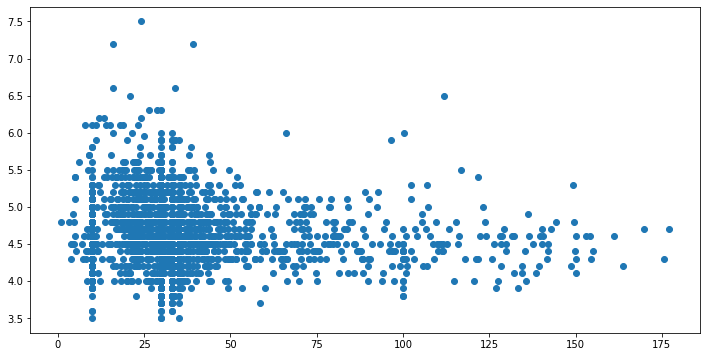

In [80]:
plt.scatter(x='depth',y='mag',data=db)

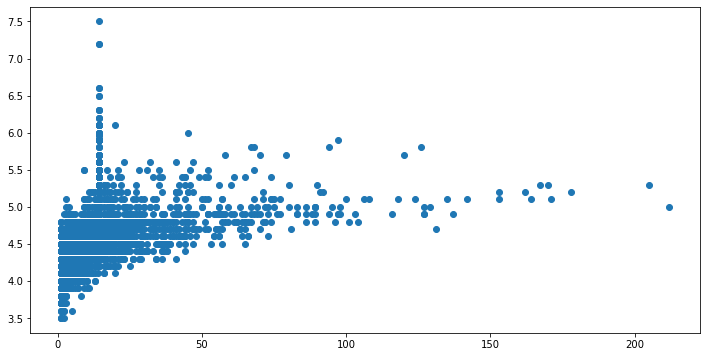

In [81]:
plt.scatter(x='magNst',y='mag',data=db)

In [82]:
db.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap',
       'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst',
       'year', 'month', 'day', 'hour', 'min'],
      dtype='object')

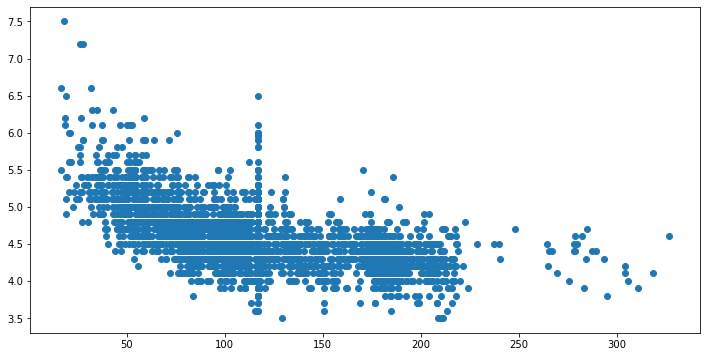

In [83]:
plt.scatter(x='gap',y='mag',data=db)

it can be seen that as gap is increasing the magnitude of earthquake also decreases. the points where we see more number of points in same line is beacuse we replaced the null values with mean

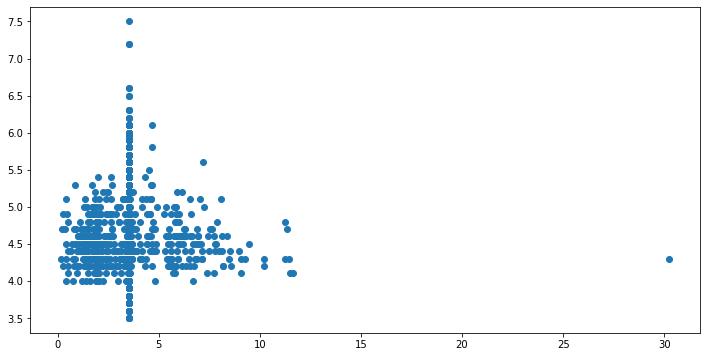

In [84]:
plt.scatter(x='dmin',y='mag',data=db)

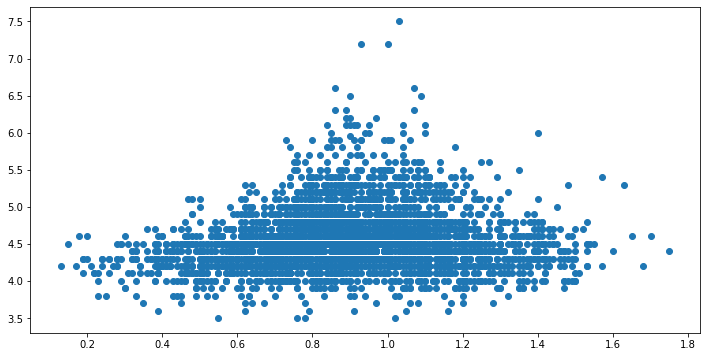

In [85]:
plt.scatter(x='rms',y='mag',data=db)

In [86]:
db.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap',
       'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst',
       'year', 'month', 'day', 'hour', 'min'],
      dtype='object')

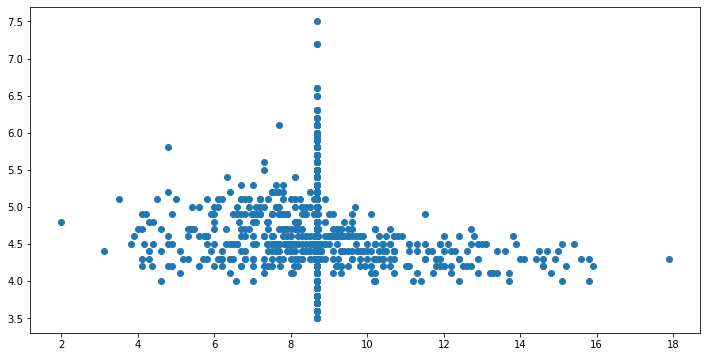

In [87]:
plt.scatter(x='horizontalError',y='mag',data=db)

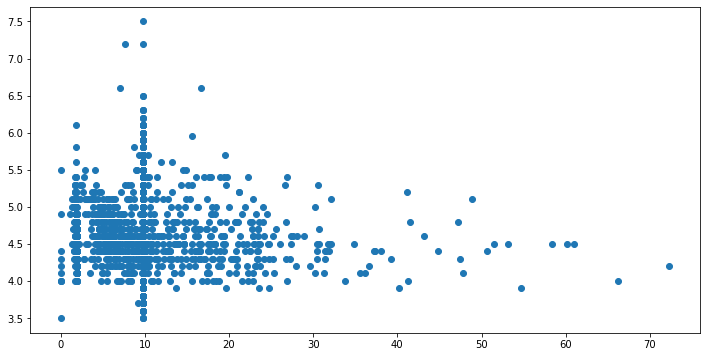

In [88]:
plt.scatter(x='depthError',y='mag',data=db)

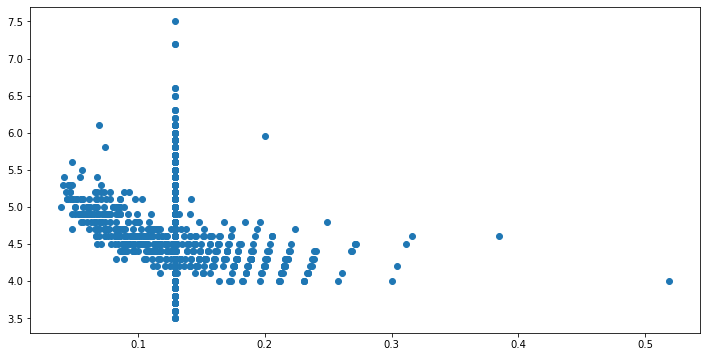

In [89]:
plt.scatter(x='magError',y='mag',data=db)

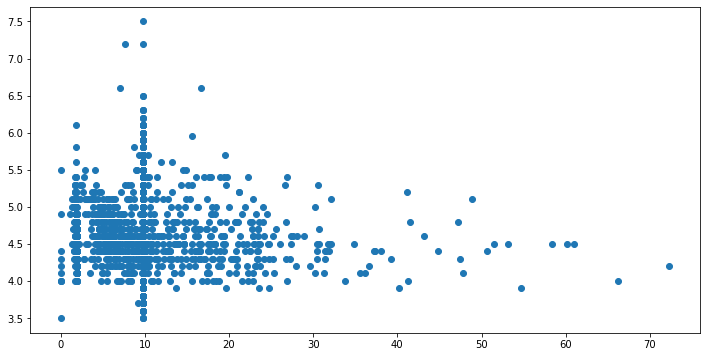

In [90]:
plt.scatter(x='depthError',y='mag',data=db)

<AxesSubplot:>

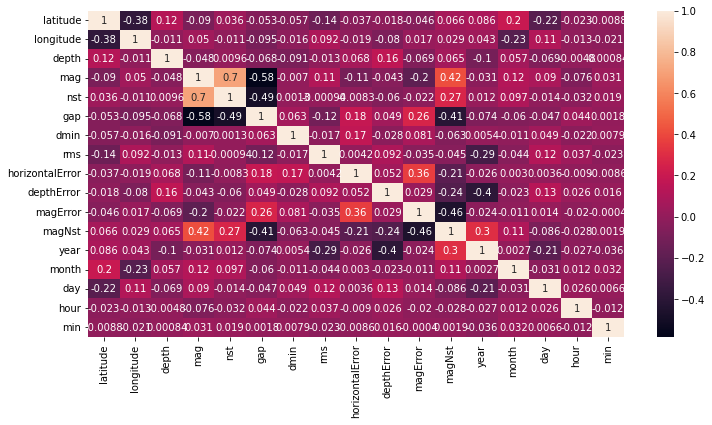

In [91]:
#drawing heatmap
sns.heatmap(db.corr(),annot=True,cbar='coolwarm')

observation:
1. variables which have positive correlation with magnitude:

    . nst ->0.4
    . magnst -> 0.42
    . depth error and magerror
2. negative corr:
     . gap -0.44
     . year -0.41
    

def correlation(data):
    pos=dict()
    neg=dict()
    corr_matrix=data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j]>0:
                pos[corr_matrix.columns[i]]=corr_matrix.iloc[i,j]
            else:
                neg[corr_matrix.columns[i]]=corr_matrix.iloc[i,j]
    print(pos)  
    print("") 
    print(neg)

In [92]:
db.drop(columns=['magType'],inplace=True)

In [93]:
db.drop(columns=['dmin'],inplace=True)

In [94]:
db.drop(columns=['depthError','min'],inplace=True)

In [95]:
db.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'rms',
       'horizontalError', 'magError', 'magNst', 'year', 'month', 'day',
       'hour'],
      dtype='object')

### feature scaling

There are two major types of feature scaling :

1. Standardization.
2. Normalization.

We can use StandardScalar to scale our data:


StandardScaler is used to resize the distribution of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1.
The values will lie be between -1 and 1.

In [96]:
#spliting the data in target and input variable
x=db.drop(columns='mag')
y=db['mag']

In [97]:
x

,latitude,longitude,depth,nst,gap,rms,horizontalError,magError,magNst,year,month,day,hour
0,11.8701,93.7364,128.366,36.000000,87.000000,0.40,8.090000,0.112000,25.000000,2023,3,31,18
1,13.3127,92.4297,10.000,77.000000,90.000000,0.86,8.360000,0.075000,56.000000,2023,3,7,11
2,9.8546,92.7139,48.355,19.000000,180.000000,0.82,12.400000,0.168000,10.000000,2023,2,24,7
3,9.2648,93.9450,11.020,37.000000,136.000000,0.68,10.590000,0.122000,20.000000,2023,2,22,9
4,12.1363,93.5873,107.401,93.000000,48.000000,0.69,6.090000,0.061000,89.000000,2023,1,30,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3344,7.5070,93.9750,21.400,47.157654,116.819556,1.40,8.681087,0.129557,14.308108,1990,8,18,18
3345,12.2250,93.7010,33.000,47.157654,116.819556,1.10,8.681087,0.129557,2.000000,1990,8,13,8
3346,12.0570,92.5920,33.000,47.157654,116.819556,1.50,8.681087,0.129557,2.000000,1990,5,4,4
3347,11.5380,92.3410,33.000,47.157654,116.819556,0.80,8.681087,0.129557,1.000000,1990,1,22,18


In [98]:
y

0       4.2
1       4.9
2       4.3
3       4.5
4       5.0
       ... 
3344    6.0
3345    4.5
3346    4.1
3347    4.8
3348    4.1
Name: mag, Length: 3349, dtype: float64

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
standarscaler=StandardScaler()

In [101]:
standarscaler=standarscaler.fit(x)
scaled_x=standarscaler.transform(x)

## Data Modelling

In [102]:
scaled_x

array([[ 0.9075828 ,  0.51799338,  4.33554022, ..., -0.59371908,
         1.3365688 ,  0.85602007],
       [ 1.53755513, -1.45902479, -1.08663807, ..., -0.59371908,
        -1.25218377, -0.1213654 ],
       [ 0.02742944, -1.02903431,  0.67034999, ..., -0.83817017,
         0.58151597, -0.67987139],
       ...,
       [ 0.98920059, -1.21346724, -0.03304075, ..., -0.10481689,
        -1.57577784, -1.09875088],
       [ 0.76255728, -1.5932266 , -0.03304075, ..., -1.08262127,
         0.36578659,  0.85602007],
       [-0.99905951,  1.18007584, -0.03304075, ..., -1.08262127,
        -0.60499562,  0.99564657]])

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,train_size=0.8, random_state=2)

### LinearRegression

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
lr=LinearRegression()

In [106]:
lr.fit(x_train,y_train)

LinearRegression()

In [107]:
lrprediction=lr.predict(x_test)

In [108]:
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error, r2_score 

In [109]:
mse = mean_squared_error(y_test, lrprediction)
rmse = mean_squared_error(y_test, lrprediction, squared=False)
mae = mean_absolute_error(y_test, lrprediction)
r2 = r2_score(y_test, lrprediction)

print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("Mean absolute error:", mae)
print("R-squared:", r2)

Mean squared error: 0.058919694382569436
Root mean squared error: 0.2427337932438939
Mean absolute error: 0.18381557084698935
R-squared: 0.6575315045635997


our predictions are not perfect, but they are reasonable. We are off by an average of 0.0589 units from the actual values, which is relatively small compared to the range of the target variable. Additionally, our R2 value of 0.657 indicates that our model is able to explain about 65.7% of the variance in the target variable.

### Random Forest

In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
rf=RandomForestRegressor()

In [112]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [113]:
rf_prediciton=rf.predict(x_test)

In [114]:
mse = mean_squared_error(y_test, rf_prediciton)
rmse = mean_squared_error(y_test, rf_prediciton, squared=False)
mae = mean_absolute_error(y_test, rf_prediciton)
r2 = r2_score(y_test, rf_prediciton)

print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("Mean absolute error:", mae)
print("R-squared:", r2)

Mean squared error: 0.03690959104477615
Root mean squared error: 0.19211868999338963
Mean absolute error: 0.14742388059701506
R-squared: 0.785464397859864


In summary, our predictions are not very accurate, and we are off by an average of 0.036 units from the actual values. Our R2 value of 0.785 indicates that our model is only able to explain about 78.5% of the variance in the target variable.
Overall, the model's accuracy seems to be fairly good based on these performance metrics, but it could potentially be improved further.



### Decision Tree

In [115]:
from sklearn.tree import DecisionTreeRegressor

In [116]:
dt=DecisionTreeRegressor(max_depth=1)

In [117]:
dt.fit(x_train,y_train)


DecisionTreeRegressor(max_depth=1)

In [118]:
dtpredicition=dt.predict(x_test)

In [119]:
mse = mean_squared_error(y_test, dtpredicition)
rmse = mean_squared_error(y_test, dtpredicition, squared=False)
mae = mean_absolute_error(y_test, dtpredicition)
r2 = r2_score(y_test, dtpredicition)

print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("Mean absolute error:", mae)
print("R-squared:", r2)

Mean squared error: 0.10032812531299186
Root mean squared error: 0.3167461527990385
Mean absolute error: 0.2320301681968528
R-squared: 0.4168465657204825


he R-squared value of 0.416 indicates that the model only explains 41% of the total variation in the target variable. This means that a large portion of the variation in the target variable is not explained by the model, 

### Support Vector Machine

In [120]:
from sklearn.svm import SVR

In [121]:
svr=SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)

In [122]:
svr.fit(x_train,y_train)

SVR(C=1000.0, gamma=0.1)

In [123]:
svrpredict=svr.predict(x_test)

In [124]:
mse = mean_squared_error(y_test, svrpredict)
rmse = mean_squared_error(y_test, svrpredict, squared=False)
mae = mean_absolute_error(y_test, svrpredict)
r2 = r2_score(y_test, svrpredict)

print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("Mean absolute error:", mae)
print("R-squared:", r2)

Mean squared error: 0.13670457468462757
Root mean squared error: 0.36973581742188244
Mean absolute error: 0.27556679562581815
R-squared: 0.205409829393691


The R-squared value indicates the proportion of variance in the target variable that can be explained by the model. A higher R-squared value indicates better performance. In this case, the R-squared value is  0.205, which indicates that the model can explain about  20.5% of the variance in the target variable. 

### Gradient Boosting

In [125]:
from sklearn.ensemble import GradientBoostingRegressor

In [126]:
gbr=GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, max_depth=1, random_state=42)

In [127]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=1, n_estimators=1000,
                          random_state=42)

In [128]:
gbrprediction=gbr.predict(x_test)

In [129]:
mse = mean_squared_error(y_test, gbrprediction)
rmse = mean_squared_error(y_test, gbrprediction, squared=False)
mae = mean_absolute_error(y_test, gbrprediction)
r2 = r2_score(y_test, svrpredict)

print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("Mean absolute error:", mae)
print("R-squared:", r2)

Mean squared error: 0.04189657633721915
Root mean squared error: 0.2046865318901543
Mean absolute error: 0.15490263537867222
R-squared: 0.205409829393691


R-squared (R2) is a measure of how well the model fits the data. It takes values between 0 and 1, with higher values indicating a better fit. In this case, the R2 score is  0.205, which is not too high.
There is significant room for improvement in our prediction, and we need to consider modifying our model or exploring different features to improve the performance.


## Random forest has the heighest accuracy : R-squared: 0.78